#                   NATURAL LANGUAGE PROCESSING

##                 SENTIMENT ANALYSIS ON MUSIC LYRICS
###                           ASSIGNMENT-2



## Natural Language Toolkit

In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Importing necessary Libraries

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random


## Analyzing and visualizing sentiment distribution in song lyrics for selected artists

In [ ]:
def perform_sentiment_analysis(df, artist_name):
    df['Lyric'] = df['Lyric'].fillna('')
    sia = SentimentIntensityAnalyzer()
    df['sentiment_score'] = df['Lyric'].apply(lambda x: sia.polarity_scores(x)['compound'])

    # Check if 'Unnamed: 0' column exists
    if 'Unnamed: 0' in df.columns:
        df.rename(columns={'Unnamed: 0': 'S.no'}, inplace=True)
    else:
        # Add 'S.no' column if it doesn't exist
        df['S.no'] = range(1, len(df) + 1)

    res = {}
    for i, row in tqdm(df.iterrows(), total=len(df), desc=f"Analyzing {artist_name}'s lyrics"):
        text = row['Lyric']
        myid = row['S.no']
        res[myid] = sia.polarity_scores(text)

    vaders = pd.DataFrame(res).T
    vaders = vaders.reset_index().rename(columns={'index': 'S.no'})
    vaders = vaders.merge(df, how='left')

    positive_comments = vaders[vaders['compound'] > 0]
    negative_comments = vaders[vaders['compound'] < 0]
    neutral_comments = vaders[vaders['compound'] == 0]

    total_comments = len(vaders)
    positive_percentage = len(positive_comments) / total_comments * 100
    negative_percentage = len(negative_comments) / total_comments * 100
    neutral_percentage = len(neutral_comments) / total_comments * 100

    print(f"\nSentiment Analysis Results for {artist_name}'s Lyrics:")
    print(f"Positive Comments: {positive_percentage:.2f}%")
    print(f"Negative Comments: {negative_percentage:.2f}%")
    print(f"Neutral Comments: {neutral_percentage:.2f}%")

    # Individual sentiment analysis pie chart
    labels = ['Positive', 'Negative', 'Neutral']
    sizes = [positive_percentage, negative_percentage, neutral_percentage]
    colors = ['#66b3ff', '#ff9999', '#99ff99']

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title(f'Distribution of Sentiment in {artist_name}\'s Lyrics')
    plt.axis('equal')

    plt.show()

    # Individual sentiment analysis bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(vaders['S.no'], vaders['compound'], color=['green' if s > 0 else 'red' if s < 0 else 'gray' for s in vaders['compound']])
    plt.xlabel('Lyric')
    plt.ylabel('Compound Sentiment Score')
    plt.title(f'Compound Sentiment Scores for {artist_name}\'s Lyrics')
    plt.show()

In [ ]:

def compare_sentiment_analysis(artists, datasets):
    fig, (ax_pie, ax_bar) = plt.subplots(2, 1, figsize=(15, 10))

    for artist, dataset in zip(artists, datasets):
        df = dataset.copy()
        df['Lyric'] = df['Lyric'].fillna('')
        sia = SentimentIntensityAnalyzer()
        df['sentiment_score'] = df['Lyric'].apply(lambda x: sia.polarity_scores(x)['compound'])

        # Check if 'Unnamed: 0' column exists
        if 'Unnamed: 0' in df.columns:
            df.rename(columns={'Unnamed: 0': 'S.no'}, inplace=True)
        else:
            # Add 'S.no' column if it doesn't exist
            df['S.no'] = range(1, len(df) + 1)

        res = {}
        for i, row in tqdm(df.iterrows(), total=len(df), desc=f"Analyzing {artist}'s lyrics"):
            text = row['Lyric']
            myid = row['S.no']
            res[myid] = sia.polarity_scores(text)

        vaders = pd.DataFrame(res).T
        vaders = vaders.reset_index().rename(columns={'index': 'S.no'})
        vaders = vaders.merge(df, how='left')

        # Individual sentiment analysis pie chart for each artist
        labels = ['Positive', 'Negative', 'Neutral']
        sizes = [
            len(vaders[vaders['compound'] > 0]) / len(vaders) * 100,
            len(vaders[vaders['compound'] < 0]) / len(vaders) * 100,
            len(vaders[vaders['compound'] == 0]) / len(vaders) * 100
        ]
        colors = ['#66b3ff', '#ff9999', '#99ff99']

        ax_pie.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
        ax_pie.set_title(f'Distribution of Sentiment in Lyrics')

        # Individual sentiment analysis bar graph for each artist
        ax_bar.bar(vaders['S.no'] + 0.2 * artists.index(artist), vaders['compound'], width=0.2, label=artist)

    ax_bar.set_xlabel('Lyric')
    ax_bar.set_ylabel('Compound Sentiment Score')
    ax_bar.legend()
    ax_bar.set_title('Comparison of Compound Sentiment Scores between Artists')

    plt.tight_layout()
    plt.show()

In [ ]:
# Read datasets
df_a = pd.read_csv('/content/ArianaGrande.csv')
df_b = pd.read_csv('/content/Beyonce.csv')
df_c = pd.read_csv('/content/BillieEilish.csv')
df_d = pd.read_csv('/content/EdSheeran.csv')
df_e = pd.read_csv('/content/JustinBieber.csv')
df_f = pd.read_csv('/content/KatyPerry.csv')
df_g = pd.read_csv('/content/CharliePuth.csv')
df_h = pd.read_csv('/content/Maroon5.csv')
df_i = pd.read_csv('/content/PostMalone.csv')
df_j = pd.read_csv('/content/Rihanna.csv')
df_k = pd.read_csv('/content/SelenaGomez.csv')
df_l = pd.read_csv('/content/ColdPlay.csv')
df_m = pd.read_csv('/content/Drake.csv')
df_n = pd.read_csv('/content/DuaLipa.csv')

datasets = {
    'Ariana Grande': df_a, 'Beyonce': df_b, 'Billie Eilish': df_c, 'Ed Sheeran': df_d, 'Justin Bieber': df_e,
    'Katy Perry': df_f, 'Charlie Puth': df_g, 'Maroon 5': df_h, 'Post Malone': df_i, 'Rihanna': df_j,
    'Selena Gomez': df_k, 'Coldplay': df_l, 'Drake': df_m, 'Dua Lipa': df_n
}


## World Could of all the artists

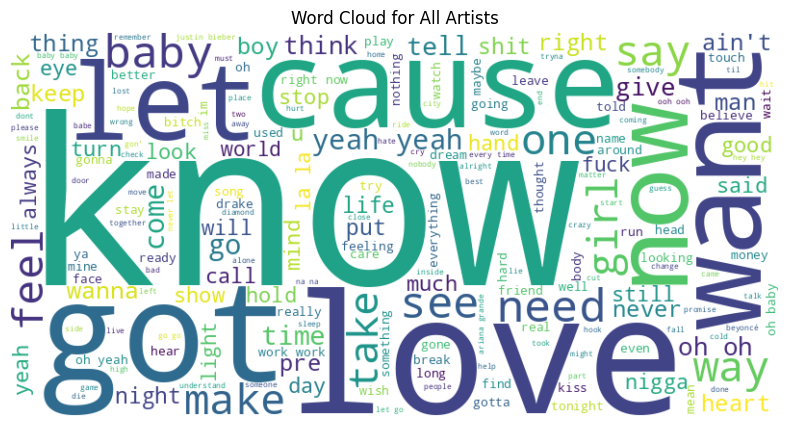

In [ ]:
# Concatenate lyrics of all artists
all_lyrics_combined = ' '.join([df['Lyric'].astype(str).str.cat(sep=' ') for df in datasets.values()])

# Generate word cloud for all artists
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics_combined)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Artists')
plt.show()

## Comparison of Lyrics between two artists ⚡

Choose an option:
1. Analyze the sentiment of a single artist
2. Compare the sentiment of two artists
Enter the number of your choice: 2
Choose the first artist by entering the corresponding number:
1. Ariana Grande
2. Beyonce
3. Billie Eilish
4. Ed Sheeran
5. Justin Bieber
6. Katy Perry
7. Charlie Puth
8. Maroon 5
9. Post Malone
10. Rihanna
11. Selena Gomez
12. Coldplay
13. Drake
14. Dua Lipa
Enter the number of the first artist: 10
Choose the second artist by entering the corresponding number:
1. Ariana Grande
2. Beyonce
3. Billie Eilish
4. Ed Sheeran
5. Justin Bieber
6. Katy Perry
7. Charlie Puth
8. Maroon 5
9. Post Malone
10. Rihanna
11. Selena Gomez
12. Coldplay
13. Drake
14. Dua Lipa
Enter the number of the second artist: 12


Analyzing Rihanna's lyrics: 100%|██████████| 405/405 [00:01<00:00, 277.30it/s]



Sentiment Analysis Results for Rihanna's Lyrics:
Positive Comments: 74.32%
Negative Comments: 22.22%
Neutral Comments: 3.46%


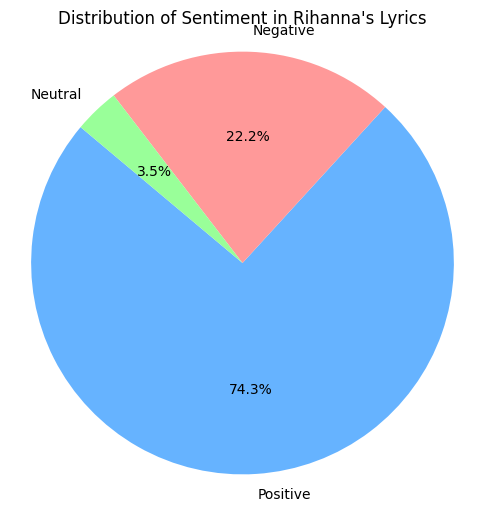

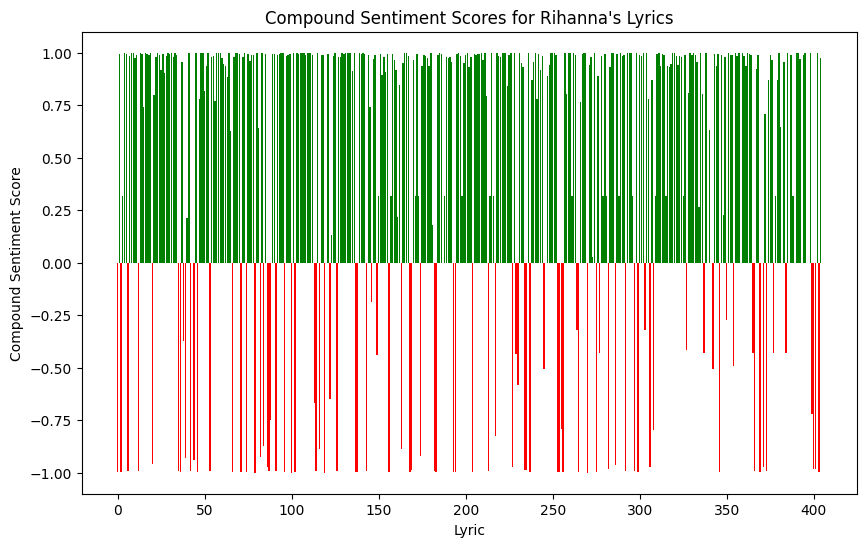

Analyzing Coldplay's lyrics: 100%|██████████| 344/344 [00:01<00:00, 322.48it/s]



Sentiment Analysis Results for Coldplay's Lyrics:
Positive Comments: 59.88%
Negative Comments: 35.47%
Neutral Comments: 4.65%


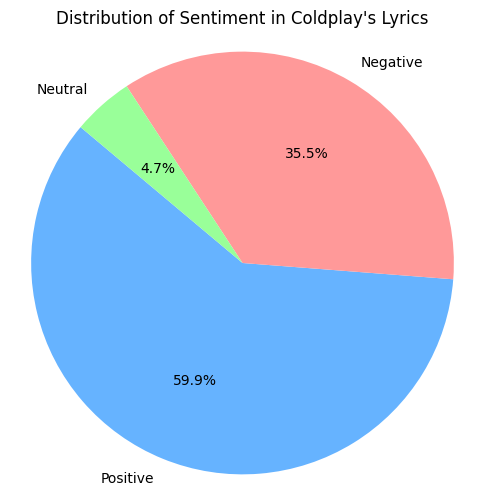

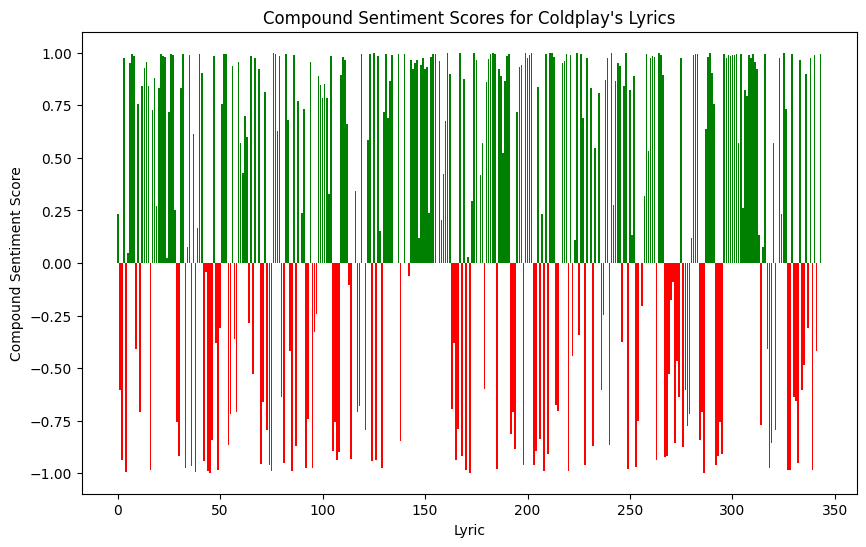

Analyzing Coldplay's lyrics: 100%|██████████| 344/344 [00:00<00:00, 604.46it/s]


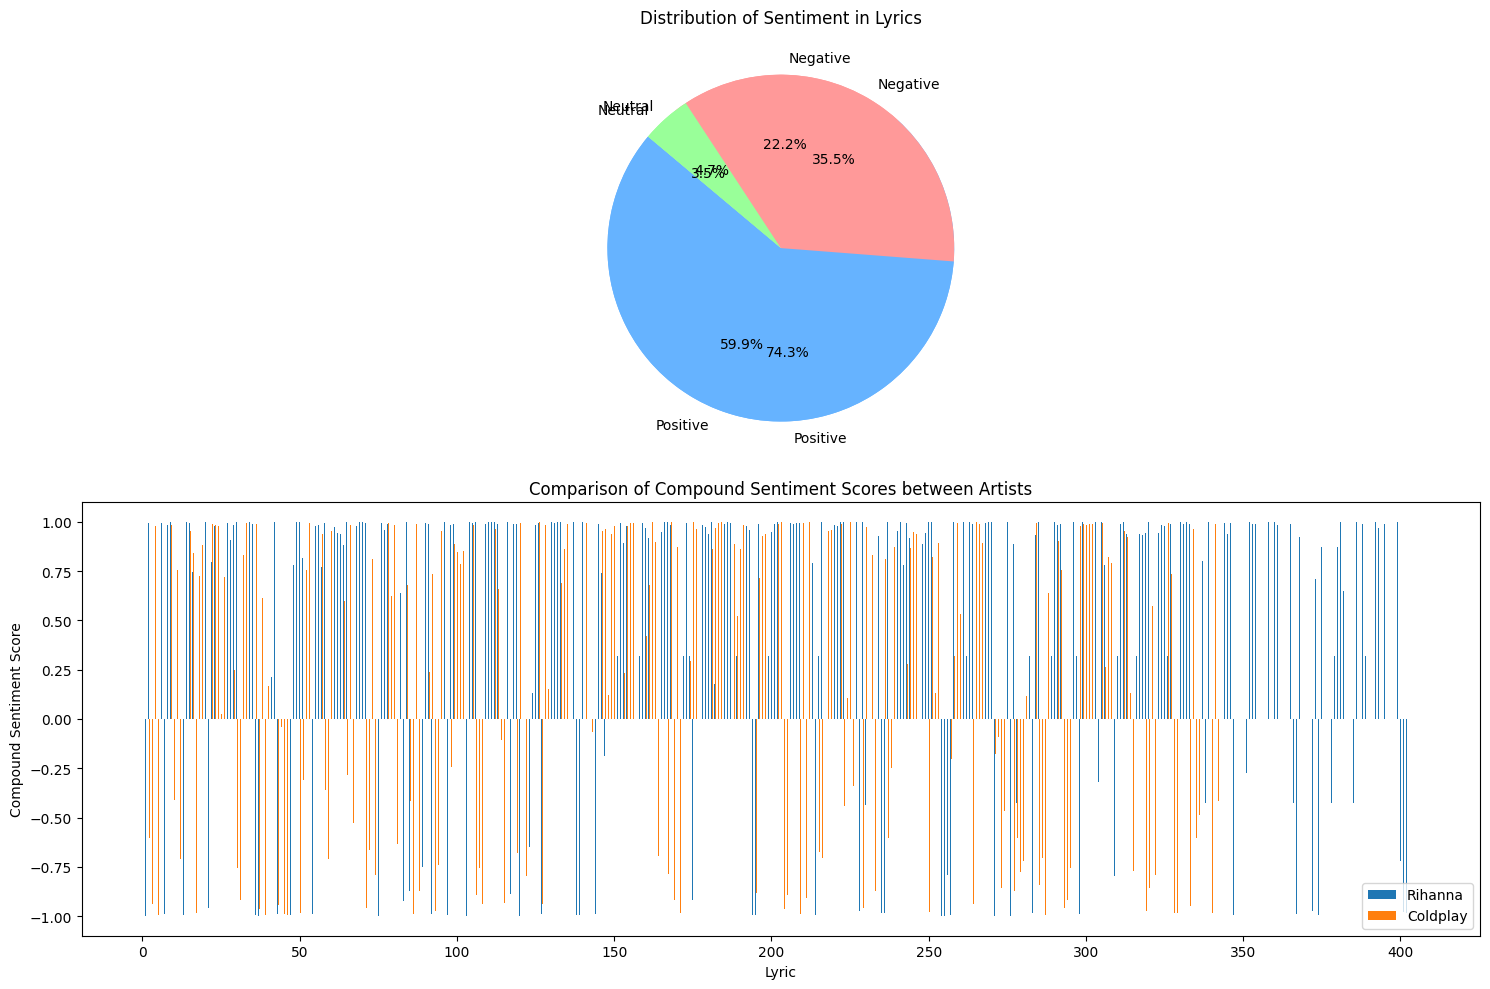

In [ ]:
# Display numbered list of artists
print("Choose an option:")
print("1. Analyze the sentiment of a single artist")
print("2. Compare the sentiment of two artists")

# Get user input for the option
while True:
    try:
        option = int(input("Enter the number of your choice: "))
        if option in [1, 2]:
            break
        else:
            print("Invalid input. Please enter 1 or 2.")
    except ValueError:
        print("Invalid input. Please enter 1 or 2.")

if option == 1:
    # Get user input for the artist
    print("Choose an artist by entering the corresponding number:")
    for i, artist in enumerate(datasets.keys(), start=1):
        print(f"{i}. {artist}")

    while True:
        try:
            selected_number = int(input("Enter the number of your choice: "))
            if 1 <= selected_number <= len(datasets):
                selected_artist = list(datasets.keys())[selected_number - 1]
                selected_dataset = datasets.get(selected_artist)
                perform_sentiment_analysis(selected_dataset, selected_artist)
                break
            else:
                print("Invalid input. Please enter a valid number.")
        except ValueError:
            print("Invalid input. Please enter a number.")
else:
    # Get user input for the first artist
    print("Choose the first artist by entering the corresponding number:")
    for i, artist in enumerate(datasets.keys(), start=1):
        print(f"{i}. {artist}")

    while True:
        try:
            artist1_number = int(input("Enter the number of the first artist: "))
            if 1 <= artist1_number <= len(datasets):
                break
            else:
                print("Invalid input. Please enter a valid number.")
        except ValueError:
            print("Invalid input. Please enter a number.")

    # Get user input for the second artist
    print("Choose the second artist by entering the corresponding number:")
    for i, artist in enumerate(datasets.keys(), start=1):
        print(f"{i}. {artist}")

    while True:
        try:
            artist2_number = int(input("Enter the number of the second artist: "))
            if 1 <= artist2_number <= len(datasets) and artist2_number != artist1_number:
                break
            else:
                print("Invalid input. Please enter a valid number different from the first artist.")
        except ValueError:
            print("Invalid input. Please enter a number.")

    # Select the artists based on user input
    selected_artists = [list(datasets.keys())[artist1_number - 1], list(datasets.keys())[artist2_number - 1]]
    selected_datasets = [datasets.get(artist) for artist in selected_artists]

    # Perform sentiment analysis for each artist
    for artist, dataset in zip(selected_artists, selected_datasets):
        perform_sentiment_analysis(dataset, artist)

    # Compare sentiment analysis
    compare_sentiment_analysis(selected_artists, selected_datasets)
